<a href="https://colab.research.google.com/github/darshita27-cmd/Regression-model/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Supervised Learning Models:Regression Models

In [ ]:
#------------------step 1: to import libraries-------------------------
import pandas as pd  # panda is used for data manipulation while working with datasets
import numpy as np   # numpy is used for numerical operations like in array and matrixes
import matplotlib.pyplot as plt   # matplotlib.pyplot is used for visualisation
import seaborn as sns    # seaborn is used with matplotlib.pyplot. it gives a better interface for drawing, graphics
from sklearn.model_selection import train_test_split   # used to slpit dataset into trai and test
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV    #  to create the linear regression model. relationship between dependent and independent variable
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # this is used to evaluate the performance the linear regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
#------------------step 2: to read csv --------------------------------
df= pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#-------------------step 3: data exploration---------------------------------
print(df.info())    # this is used to get the insights of the data. it gives the number of rows, number of columns, data-tuype of the columns, help to find if there are missing values in the dataset
print(df.describe())   # makes the descrptive statical analisis of data. it gives the count of non-null values, mean of each col, standard deviasion of each col, min value of each col, 25% dataset falls (first quaritile), 50% median (second quaritile), the values below which 75% of data falls (third quaritile), max value of each col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [ ]:
features=[ 'area', 'bedrooms',	'bathrooms',	'stories']  # independent variables
target=['price']   # dependent variable
x=df[features]
y=df[target]

In [ ]:
#------------------step 4: data cleaning and preprocessing -----------------------
df= df.dropna(subset=['price']) # dropna removes the row that contains atleast one missing. subset specify if 'price' is NaN(not a number) then the row will be deleted.
numeric_cols=df.select_dtypes(include=np.number).columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean()) # this will fill the mean value in place of missing values. we are selecting numeric_cols to fill the mean values.fillna is used to fill the missing values.df.mean will calculate the mean of each col and when used with fillna it will fill the mean value in the missing places, inplace='True' is used to modify the dataframe directly rather than returning a new dataframe

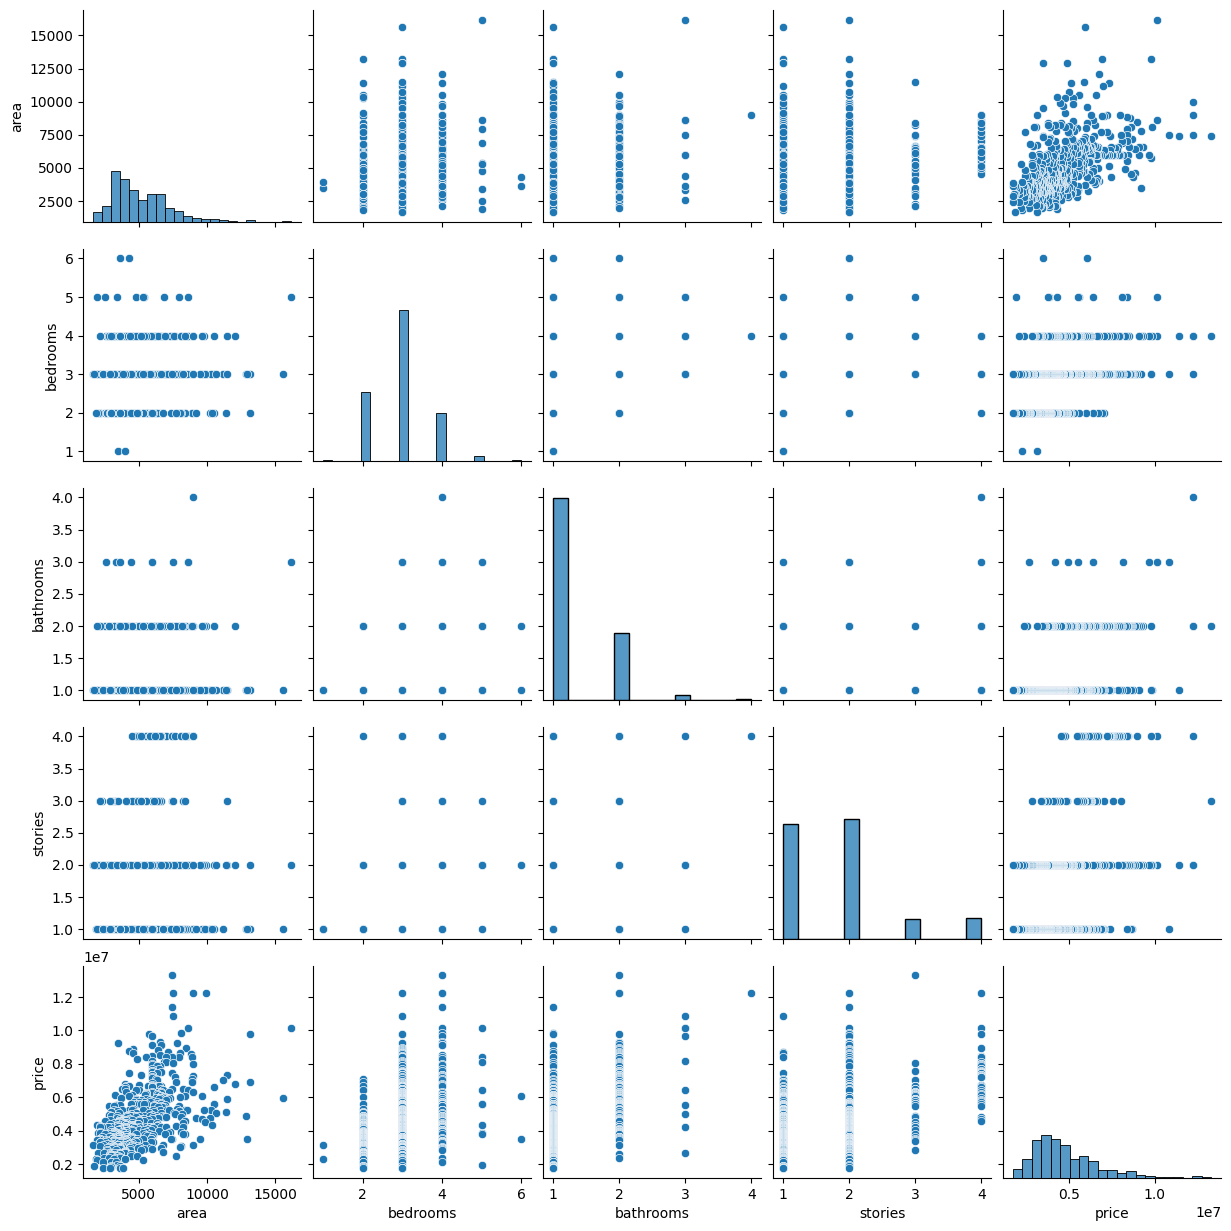

In [ ]:
# ----------------step: 5: data visualization---------------------------------
sns.pairplot(df[features+target])   # creates the a grid of scatter plots
plt.show()   # display the plots

In [ ]:
#----------------------step 6: to split the data into test andt train-------------------------
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#------------------------step 7: build the regression model----------------------
poly = PolynomialFeatures(degree=5)  # helps the model to learn quadraticaly
x_train_poly=poly.fit_transform(x_train)  # fit calculates necessay parameters like number of features.  transform generates the polynomial new features example: kf there are features like A and B than it will create a new features as A*B
x_test_poly=poly.transform(x_test)
linear_regression_model= LinearRegression().fit(x_train,y_train)
polynomial_regression_model=LinearRegression().fit(x_train_poly, y_train)

##################### cheking the best alpha value##################
ridge_cv=RidgeCV(alphas=[0.01,0.1,1,10,100], store_cv_values=True)
ridge_cv.fit(x_train, y_train)
print("best alpha value for ridge = ", ridge_cv.alpha_)

lasso_cv=LassoCV(alphas=[0.01,0.1,1.0,10,100], cv=5)
lasso_cv.fit(x_train, y_train)
print("best apha value for lasso regression = ", lasso_cv.alpha_)
###########################################################

ridge_regression_model=Ridge(alpha=1.0).fit(x_train_poly, y_train)
lasso_regression_model=Lasso(alpha=100).fit(x_train_poly, y_train)

best alpha value for ridge =  1.0
best apha value for lasso regression =  100.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.68006e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.4

In [ ]:
#---------------------step 8:make predections --------------------------------
y_predict_linear_regression=linear_regression_model.predict(x_test)
y_predict_polynomial_regression=polynomial_regression_model.predict(x_test_poly)
y_predict_ridge_regression=ridge_regression_model.predict(x_test_poly)
y_predict_lasso_regresson=lasso_regression_model.predict(x_test_poly)

In [ ]:
#-------------------step 9: evaluate the model's performance --------------------------------
mae_linear_regression=mean_absolute_error(y_test, y_predict_linear_regression)  # mean_absolute_error, mean_squared_error, r2_score is used to quntify the accuracy of regression model by measuring the average magnitute errors in predictions
mse_linear_regression=mean_squared_error(y_test, y_predict_linear_regression)
r2_linear_regression=r2_score(y_test, y_predict_linear_regression)
print(f'mean_absolute_error_linear_regression ={mae_linear_regression}')
print(f'mean_squared_error_linear_regression={mse_linear_regression}')
print(f'r2_score_linear_regression={r2_linear_regression}')

mae_polynomial_regression=mean_absolute_error(y_test, y_predict_polynomial_regression)
mse_polynomial_regression=mean_squared_error(y_test, y_predict_polynomial_regression)
r2_polynomial_regression=r2_score(y_test, y_predict_polynomial_regression)
print(f'mean_absolute_error_polynomial_regression ={mae_polynomial_regression}')
print(f'mean_squared_error_polynomial_regression={mse_polynomial_regression}')
print(f'r2_score_polynomial_regression={r2_polynomial_regression}')

mae_ridge_regression=mean_absolute_error(y_test, y_predict_ridge_regression)
mse_ridge_regression=mean_squared_error(y_test, y_predict_ridge_regression)
r2_ridge_regression=r2_score(y_test, y_predict_ridge_regression)
print(f"mean_absolute_error_ridge_regression={mae_ridge_regression}")
print(f"mean_squared_error_ridge_regression={mse_ridge_regression}")
print(f"r2_score_ridge_regression={r2_ridge_regression}")

mae_lasso_regression=mean_absolute_error(y_test, y_predict_lasso_regresson)
mse_lasso_regression=mean_squared_error(y_test, y_predict_lasso_regresson)
r2_lasso_regression=r2_score(y_test, y_predict_lasso_regresson)
print(f"mean_absolute_error_lasso_regression={mae_lasso_regression}")
print(f"mean_squared_error_lasso_regression={mse_lasso_regression}")
print(f"r2_score_lasso_regression={r2_lasso_regression}")

mean_absolute_error_linear_regression =1158970.4803166878
mean_squared_error_linear_regression=2457741642022.087
r2_score_linear_regression=0.513758534903707
mean_absolute_error_polynomial_regression =1272293.9682488912
mean_squared_error_polynomial_regression=3170622017943.106
r2_score_polynomial_regression=0.37272174222396726
mean_absolute_error_ridge_regression=27067448.19544804
mean_squared_error_ridge_regression=2.5114903042008956e+16
r2_score_ridge_regression=-4967.751410685515
mean_absolute_error_lasso_regression=1164555.8177054573
mean_squared_error_lasso_regression=2727776043627.251
r2_score_lasso_regression=0.46033472467975356


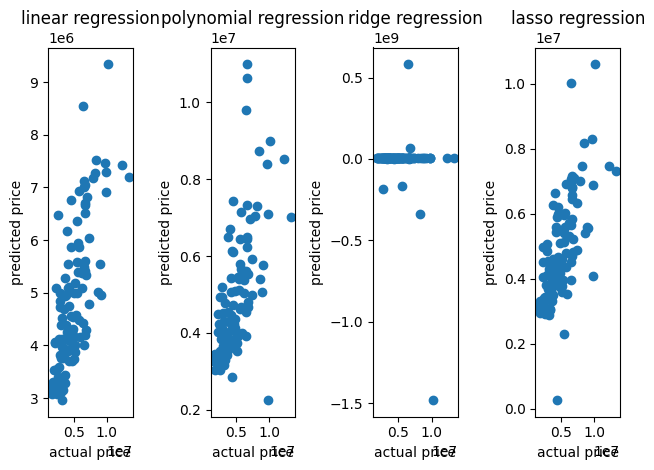

In [73]:
#--------------------step 10: visualize the predictions -----------------

plt.subplot(1,4,1)
plt.scatter(y_test, y_predict_linear_regression)    # making a scatter plot
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('linear regression')



plt.subplot(1,4,2)   #   syntax (number of rows in subplot, number of columns of subplot, activate the subplot of the grid)
plt.scatter(y_test, y_predict_polynomial_regression)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('polynomial regression')


plt.subplot(1,4,3)
plt.scatter(y_test, y_predict_ridge_regression)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('ridge regression')


plt.subplot(1,4,4)
plt.scatter(y_test, y_predict_lasso_regresson)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('lasso regression')

plt.tight_layout()
plt.show()

In [ ]:
print("linear regression=",linear_regression_model.score(x_test, y_test))  # for linear regression
print("polynomial regression=",polynomial_regression_model.score(x_test_poly, y_test))  # for polynomial regression
print("ridge regression=",ridge_regression_model.score(x_test_poly, y_test))  # for ridge regression
print("lasso regression=",lasso_regression_model.score(x_test_poly, y_test))  # for lasso regression

linear regression= 0.513758534903707
polynomial regression= 0.37272174222396726
ridge regression= -33.55981490064478
lasso regression= 0.4603333661782252
